In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [25]:
df=pd.read_csv('mnist.csv')
df.sample(10)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
31451      5       0       0       0       0       0       0       0       0   
25786      9       0       0       0       0       0       0       0       0   
29869      5       0       0       0       0       0       0       0       0   
1843       9       0       0       0       0       0       0       0       0   
28451      0       0       0       0       0       0       0       0       0   
7997       2       0       0       0       0       0       0       0       0   
5115       6       0       0       0       0       0       0       0       0   
19287      0       0       0       0       0       0       0       0       0   
23358      7       0       0       0       0       0       0       0       0   
24043      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
31451       0  ...         0         0         0         0         0   
25786       0  ...         0         0         0         0         0   
29869       0  ...         0         0         0         0         0   
1843        0  ...         0         0         0         0         0   
28451       0  ...         0         0         0         0         0   
7997        0  ...         0         0         0         0         0   
5115        0  ...         0         0         0         0         0   
19287       0  ...         0         0         0         0         0   
23358       0  ...         0         0         0         0         0   
24043       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
31451         0         0         0         0         0  
25786         0         0         0         0         0  
29869         0         0         0         0         0  
1843          0         0         0         0         0  
28451         0         0         0         0         0  
7997          0         0         0         0         0  
5115          0         0         0         0         0  
19287         0         0         0         0         0  
23358         0         0         0         0         0  
24043         0         0         0         0         0  

[10 rows x 785 columns]

In [26]:
df.shape

(42000, 785)

In [27]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

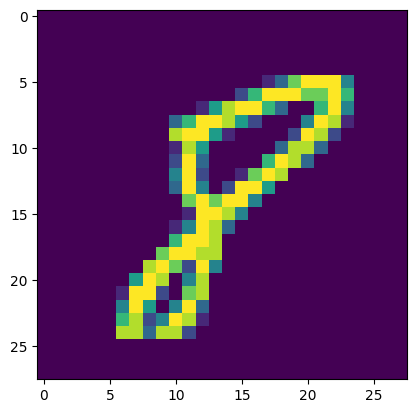

In [28]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))

In [29]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
X_train.shape

(33600, 784)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [33]:
import time
start=time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)

20.611700534820557


In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

## Using PCA

In [35]:
# After running the dataframe again
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [36]:
X_train.shape

(33600, 784)

In [37]:
from sklearn.decomposition import PCA
pca1=PCA(n_components=200)

In [38]:
X_train_trf=pca1.fit_transform(X_train)
X_test_trf=pca1.transform(X_test)

In [39]:
X_train_trf.shape

(33600, 200)

In [40]:
knn1=KNeighborsClassifier()

In [41]:
knn1.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [42]:
y_pred=knn1.predict(X_test_trf)
accuracy_score(y_test,y_pred)

0.9511904761904761

In [43]:
#  It take some much time to run
# It shows how accuracy improves as the components are increased.
# for i in range(1,785):
#     pca=PCA(n_components=i)
#     X_train_trf=pca.fit_transform(X_train)
#     X_test_trf=pca.transform(X_test)

# knn=KNeighborsClassifier()
# knn.fit(X_train_trf,y_train)
# y_pred=knn.predict(X_test_trf)
# print(accuracy_score(y_test,y_pred))

In [56]:
#  transforming to 2D coordinate system
pca2=PCA(n_components=2)
X_train_trf=pca2.fit_transform(X_train)
X_test_trf=pca2.transform(X_test)

In [57]:
X_train_trf

array([[-2.71863253, -0.48982409],
       [-0.67698015, -6.75362491],
       [-3.03323281,  6.50981624],
       ...,
       [ 2.14883643,  0.78079444],
       [ 1.05957006,  0.94767312],
       [17.70258446,  1.96188185]])

In [58]:
import plotly.express as px
y_train_trf=y_train.astype(str)
fig=px.scatter(x=X_train_trf[:,0],
              y=X_train_trf[:,1],
              color=y_train_trf,
              color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [63]:
# Eigen value
pca1.explained_variance_

array([40.67111198, 29.17023401, 26.74459621, 20.85344792, 18.14891878,
       15.8529825 , 13.87108101, 12.48058967, 11.02794236, 10.09582533,
        9.63317821,  8.62785945,  8.06303131,  7.89511749,  7.44167929,
        7.17032873,  6.73266373,  6.62744023,  6.41499161,  6.25808269,
        5.90495742,  5.76521585,  5.52084601,  5.32003847,  5.18309925,
        4.93439597,  4.90652171,  4.71800493,  4.49824444,  4.43140305,
        4.32604521,  4.23491831,  4.10335015,  4.0673118 ,  4.02362178,
        3.84130473,  3.81886146,  3.71316498,  3.60918108,  3.47303214,
        3.42842989,  3.38841159,  3.29157511,  3.22927379,  3.21745142,
        3.15810372,  3.12620905,  3.10412385,  3.05892795,  3.03728188,
        2.96540461,  2.94033669,  2.86828564,  2.82617865,  2.80038441,
        2.77411221,  2.71978838,  2.69394232,  2.64724369,  2.63065837,
        2.56498699,  2.53651735,  2.48789582,  2.44610051,  2.42066567,
        2.37577156,  2.35505085,  2.33408709,  2.29804042,  2.25

In [64]:
# Coordinate of each eigen vector
pca1.components_

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [65]:
# For each eigen vectors out of 3, no. of components is 784
pca1.components_.shape

(200, 784)

In [66]:
# It determine the ratio of each eigen value divided by the sum of eigen values.
# In short, we are looking for that total no. of components, the sum of whose variance ratio will be around 90 %
pca1.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239, 0.02966263, 0.02581562,
       0.0225498 , 0.01973068, 0.0177528 , 0.01568651, 0.01436063,
       0.01370255, 0.01227255, 0.01146912, 0.01123027, 0.01058529,
       0.01019931, 0.00957676, 0.00942709, 0.00912489, 0.0089017 ,
       0.0083994 , 0.00820063, 0.00785303, 0.0075674 , 0.00737261,
       0.00701885, 0.0069792 , 0.00671104, 0.00639845, 0.00630337,
       0.00615351, 0.00602389, 0.00583674, 0.00578548, 0.00572333,
       0.005464  , 0.00543207, 0.00528173, 0.00513382, 0.00494015,
       0.00487671, 0.00481979, 0.00468204, 0.00459342, 0.00457661,
       0.00449219, 0.00444682, 0.00441541, 0.00435112, 0.00432033,
       0.00421809, 0.00418243, 0.00407994, 0.00402005, 0.00398336,
       0.00394599, 0.00386872, 0.00383195, 0.00376553, 0.00374193,
       0.00364852, 0.00360803, 0.00353886, 0.00347941, 0.00344323,
       0.00337938, 0.0033499 , 0.00332008, 0.00326881, 0.00320508,
       0.00318776, 0.00311389, 0.00309633, 0.00305831, 0.00303

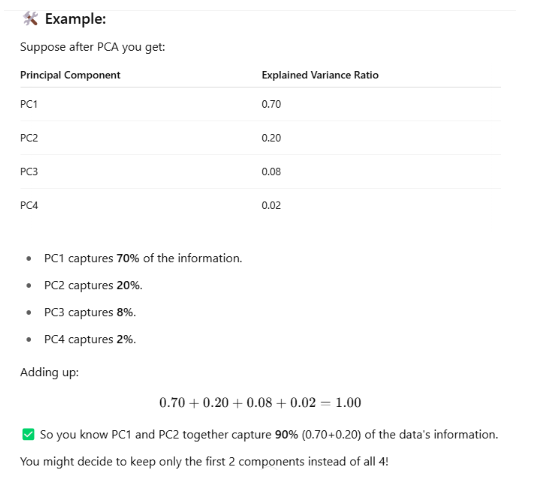

Way to find optimum no. of PC

In [67]:
pca4=PCA(n_components=None)
X_train_trf=pca4.fit_transform(X_train)
X_test_trf=pca4.transform(X_test)

In [68]:
X_train_trf.shape

(33600, 784)

In [69]:
np.cumsum(pca4.explained_variance_ratio_)
# 0.05785192 --> Sum of 1st explain variance ratio 5.78519225e-02
# 0.09934462 --> Sum of first two explained_varaince_ratio_  (5.78519225e-02 + 4.14926968e-02)
# 0.13738701 --> Sum of first three explained_variance_ratio_ (5.78519225e-02 + 4.14926968e-02 + 3.80423901e-02)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

Text(0, 0.5, 'Variance')

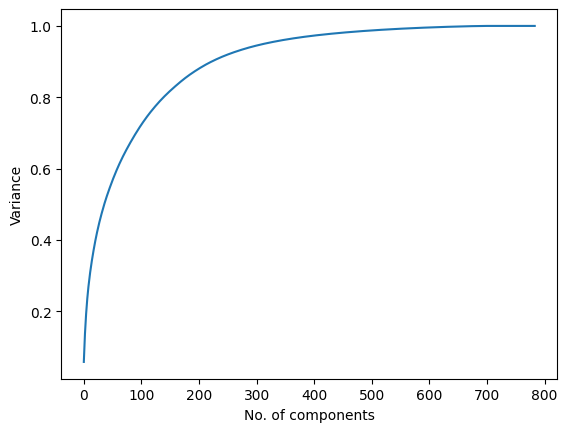

In [70]:
plt.plot(np.cumsum(pca4.explained_variance_ratio_))
plt.xlabel("No. of components")
plt.ylabel("Variance")

So. do try to use n_components approx 200 to get good variance and with the help of only those components u can achieve good accuracy level while training model.

PCA fails on a nonlinear dataset.

The points fall into x axis and  we lose  the  information actually it retains, moreover sometime variance become equal from any side it is being taken.

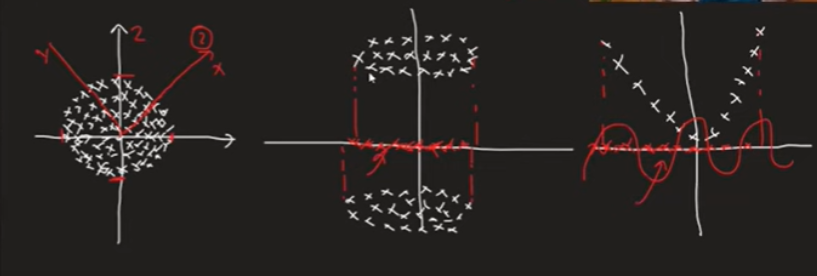

In [71]:
import joblib

# Save the model and PCA
joblib.dump(knn1, "knn_model.pkl")
joblib.dump(pca1, "pca_transformer.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [75]:
from google.colab import files
files.download("knn_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [93]:
from PIL import Image
import numpy as np

# Load saved model and transformers
knn = joblib.load("knn_model.pkl")
pca = joblib.load("pca_transformer.pkl")
scaler = joblib.load("scaler.pkl")

def preprocess_image(img_path):
    img = Image.open(img_path).convert('L')  # Grayscale
    img = img.resize((28, 28))               # Resize to 28x28

    img_array = np.array(img)

    # Invert if background is lighter than digit
    if np.mean(img_array) > 127:
        img_array = 255 - img_array

    img_flat = img_array.flatten().reshape(1, -1)

    # Scale and PCA
    pixel_columns = [f"pixel{i}" for i in range(784)]
    img_df = pd.DataFrame(img_flat, columns=pixel_columns)
    img_scaled = scaler.transform(img_df)
    img_pca = pca.transform(img_scaled)

    return img_pca

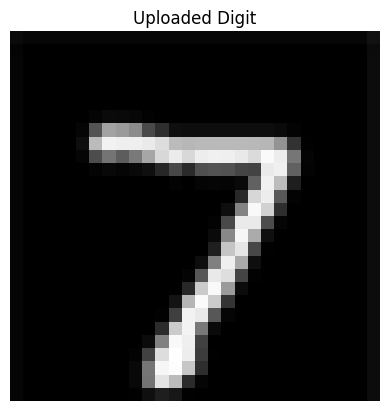

In [109]:
import matplotlib.pyplot as plt

img = Image.open("7 digit.webp").convert('L').resize((28, 28))
img_array = np.array(img)
plt.imshow(img_array, cmap='gray')
plt.title("Uploaded Digit")
plt.axis('off')
plt.show()


In [110]:
# Path to your uploaded digit image
image_path =r"7 digit.webp"  # Change to your uploaded image

# Preprocess and predict
processed_image = preprocess_image(image_path)
prediction = knn.predict(processed_image)

print("Predicted Digit:", prediction[0])


Predicted Digit: 7
